Name: Saniya Devale <br>
Task 2: IRIS FLOWER CLASSIFICATION

Importing Library

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Reading Dataset and exploring it

In [ ]:
df=pd.read_csv('IRIS.csv')

In [ ]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Visualizing data

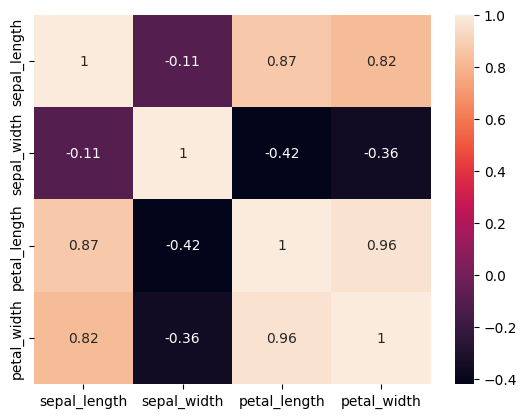

In [ ]:
data = df.drop('species',axis=1)
sn.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
average = df.groupby('species').mean()
average.index

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='species')

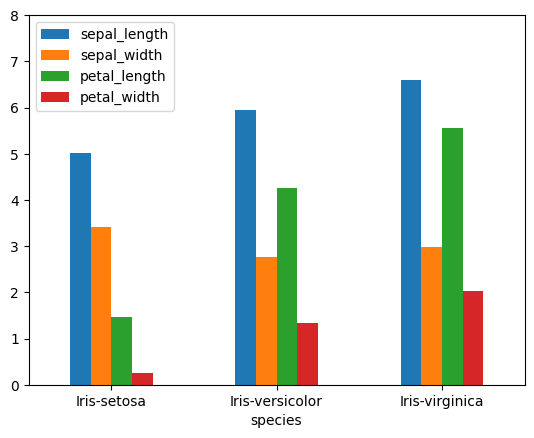

In [ ]:
plant_type_fig, ax = plt.subplots(dpi=100)
average.plot.bar(rot=0, ax=ax)
plt.ylim(0, 8)
plt.show()


In [ ]:
species = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df['species']=df['species'].map(species)

In [ ]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Dividing data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [ ]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
train_y = train.species
test_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
test_y = train.species

Applying various training models

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_X,train_y)
y_pred = logreg.predict(test_X)
acc_log = round(metrics.accuracy_score(y_pred,test_y)*100,2)

In [ ]:
#K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X,train_y)
y_pred = knn.predict(test_X)
acc_knn = round(metrics.accuracy_score(y_pred,test_y)*100,2)

In [ ]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
y_pred = decision_tree.predict(test_X)
acc_decision_tree = round(metrics.accuracy_score(y_pred,test_y)*100,2)

Choosing Decision Tree for further computations

In [ ]:
results = pd.DataFrame({
    'Model':['Logistic Regression','K Nearest Neighbor','Decision Tree'],
    'Score':[acc_log,acc_knn,acc_decision_tree]
})
result_df = results.sort_values(by='Score',ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Decision Tree
98.21,Logistic Regression
96.43,K Nearest Neighbor


Testing Model with user Entered Value

In [ ]:
sepal_length=float(input('Enter Sepal Length: '))
sepal_width=float(input('Enter Sepal width: '))
petal_length = float(input('Enter Petal Length: '))
petal_width = float(input('Enter Petal Width: '))

input_list = [sepal_length,sepal_width,petal_length,petal_width]
feature_name = df.drop(['species'],axis=1).columns.tolist()
input_df = pd.DataFrame([input_list],columns=feature_name)
Prediction = decision_tree.predict(input_df)

if Prediction ==0:
  print('Iris-setosa')
elif Prediction == 1:
  print('Iris-versicolor')
else:
  print('Iris-virginica')

Enter Sepal Length: 5.1
Enter Sepal width: 3.5
Enter Petal Length: 1.4
Enter Petal Width: 0.2
Iris-setosa
